In [28]:
import pandas as pd
import kagglehub
import marimo as mo
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Download and load data

In [29]:
# Download latest version
path = Path(
    kagglehub.dataset_download(
        "rohanrao/formula-1-world-championship-1950-2020"
    )
)

print("Path to dataset files:", path)

Path to dataset files: /home/dawid/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/24


In [30]:
circuits = pd.read_csv(path / "circuits.csv")

constructor_results = pd.read_csv(path / "constructor_results.csv")
constructor_standings = pd.read_csv(path / "constructor_standings.csv")
constructors = pd.read_csv(path / "constructors.csv")

driver_standings = pd.read_csv(path / "driver_standings.csv")
drivers = pd.read_csv(path / "drivers.csv")

lap_times = pd.read_csv(path / "lap_times.csv")

pit_stops = pd.read_csv(path / "pit_stops.csv")

qualifying = pd.read_csv(path / "qualifying.csv")

races = pd.read_csv(path / "races.csv")
race_results = pd.read_csv(path / "results.csv")

seasons = pd.read_csv(path / "results.csv")

sprint_results = pd.read_csv(path / "sprint_results.csv")

status = pd.read_csv(path / "status.csv")

# Display most important tables, clean and merge them

In [31]:
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [32]:
def clean_constructors(df: pd.DataFrame) -> pd.DataFrame:
    to_drop = list(set(df.columns) - {"constructorId", "name"})
    return df.drop(columns=to_drop, inplace=False)


def rename_name_column(df: pd.DataFrame) -> pd.DataFrame:
    return df.rename(columns={"name": "constructor_name"})


def change_constructor_name_type(df: pd.DataFrame) -> pd.DataFrame:
    return df.astype({"constructor_name": "category"})


constructors_cleaned = (
    constructors.pipe(clean_constructors)
    .pipe(rename_name_column)
    .pipe(change_constructor_name_type)
)
constructors_cleaned

,constructorId,constructor_name
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso
...,...,...
207,210,Haas F1 Team
208,211,Racing Point
209,213,AlphaTauri
210,214,Alpine F1 Team


In [33]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,lawson,30,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson
858,860,bearman,38,BEA,Oliver,Bearman,2005-05-08,British,http://en.wikipedia.org/wiki/Oliver_Bearman
859,861,colapinto,43,COL,Franco,Colapinto,2003-05-27,Argentinian,http://en.wikipedia.org/wiki/Franco_Colapinto


In [34]:
def clean_drivers(df: pd.DataFrame) -> pd.DataFrame:
    to_drop = list(set(df.columns) - {"driverId", "forename", "surname"})
    return df.drop(columns=to_drop, inplace=False)


def merge_columns_and_clean(df: pd.DataFrame) -> pd.DataFrame:
    return df.assign(driver_name=df["forename"] + " " + df["surname"]).drop(
        columns=["forename", "surname"], inplace=False
    )


def change_driver_name_type(df: pd.DataFrame) -> pd.DataFrame:
    return df.astype({"driver_name": "category"})


drivers_cleaned = (
    drivers.pipe(clean_drivers)
    .pipe(merge_columns_and_clean)
    .pipe(change_driver_name_type)
)
drivers_cleaned

,driverId,driver_name
0,1,Lewis Hamilton
1,2,Nick Heidfeld
2,3,Nico Rosberg
3,4,Fernando Alonso
4,5,Heikki Kovalainen
...,...,...
856,858,Logan Sargeant
857,859,Liam Lawson
858,860,Oliver Bearman
859,861,Franco Colapinto


In [35]:
race_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,26760,1144,825,210,20,14,16,16,16,0.0,57,\N,\N,57,1,1:25.637,222.002,11
26755,26761,1144,859,215,30,12,17,17,17,0.0,55,\N,\N,52,12,1:28.751,214.212,5
26756,26762,1144,822,15,77,9,\N,R,18,0.0,30,\N,\N,14,19,1:29.482,212.462,130
26757,26763,1144,861,3,43,20,\N,R,19,0.0,26,\N,\N,5,17,1:29.411,212.631,5


In [36]:
def clean_race_results(df: pd.DataFrame) -> pd.DataFrame:
    to_drop = list(
        set(df.columns)
        - {"raceId", "driverId", "constructorId", "grid", "position"}
    )
    return df.drop(columns=to_drop, inplace=False)


def change_position_type(df: pd.DataFrame) -> pd.DataFrame:
    if df["position"].dtype == object:
        return df.assign(
            position=df["position"].str.replace("\\N", "0").astype("int")
        )
    return df


def rename_columns(df: pd.DataFrame) -> pd.DataFrame:
    return df.rename(
        columns={"grid": "start_position", "position": "race_result"}
    )


race_results_cleaned = (
    race_results.pipe(clean_race_results)
    .pipe(change_position_type)
    .pipe(rename_columns)
)
race_results_cleaned

,raceId,driverId,constructorId,start_position,race_result
0,18,1,1,1,1
1,18,2,2,5,2
2,18,3,3,7,3
3,18,4,4,11,4
4,18,5,1,3,5
...,...,...,...,...,...
26754,1144,825,210,14,16
26755,1144,859,215,12,17
26756,1144,822,15,9,0
26757,1144,861,3,20,0


In [37]:
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [38]:
def clean_races(df: pd.DataFrame) -> pd.DataFrame:
    to_drop = list(set(df.columns) - {"raceId", "name", "date"})
    return df.drop(
        columns=to_drop,
        inplace=False,
    )


def change_name_date_types(df: pd.DataFrame) -> pd.DataFrame:
    return df.assign(date=pd.to_datetime(df["date"])).astype(
        {"name": "category"}
    )


def rename_race_name(df: pd.DataFrame) -> pd.DataFrame:
    return df.rename(columns={"name": "race_name", "date": "race_date"})


races_cleaned = (
    races.pipe(clean_races).pipe(change_name_date_types).pipe(rename_race_name)
)
races_cleaned

,raceId,race_name,race_date
0,1,Australian Grand Prix,2009-03-29
1,2,Malaysian Grand Prix,2009-04-05
2,3,Chinese Grand Prix,2009-04-19
3,4,Bahrain Grand Prix,2009-04-26
4,5,Spanish Grand Prix,2009-05-10
...,...,...,...
1120,1140,Mexico City Grand Prix,2024-10-27
1121,1141,São Paulo Grand Prix,2024-11-03
1122,1142,Las Vegas Grand Prix,2024-11-23
1123,1143,Qatar Grand Prix,2024-12-01


In [39]:
qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
10489,10547,1144,848,3,23,16,1:23.821,\N,\N
10490,10548,1144,855,15,24,17,1:23.880,\N,\N
10491,10549,1144,1,131,44,18,1:23.887,\N,\N
10492,10550,1144,861,3,43,19,1:23.912,\N,\N


In [40]:
def clean_qualifying(df: pd.DataFrame) -> pd.DataFrame:
    to_drop = list(set(df.columns) - {"raceId", "driverId", "position"})
    return df.drop(columns=to_drop, inplace=False)


def rename_position(df: pd.DataFrame) -> pd.DataFrame:
    return df.rename(columns={"position": "quali_result"})


qualifying_cleaned = qualifying.pipe(clean_qualifying).pipe(rename_position)
qualifying_cleaned

,raceId,driverId,quali_result
0,18,1,1
1,18,9,2
2,18,5,3
3,18,13,4
4,18,2,5
...,...,...,...
10489,1144,848,16
10490,1144,855,17
10491,1144,1,18
10492,1144,861,19


In [41]:
def merge_races(df: pd.DataFrame, to_merge: pd.DataFrame) -> pd.DataFrame:
    return df.merge(right=to_merge, how="inner", on="raceId")


def merge_qualifications(
    df: pd.DataFrame, to_merge: pd.DataFrame
) -> pd.DataFrame:
    return df.merge(right=to_merge, how="left", on=["driverId", "raceId"])


full_race_weekend = race_results_cleaned.pipe(
    merge_races, to_merge=races_cleaned
).pipe(merge_qualifications, to_merge=qualifying_cleaned)
full_race_weekend

,raceId,driverId,constructorId,start_position,race_result,race_name,race_date,quali_result
0,18,1,1,1,1,Australian Grand Prix,2008-03-16,1.0
1,18,2,2,5,2,Australian Grand Prix,2008-03-16,5.0
2,18,3,3,7,3,Australian Grand Prix,2008-03-16,7.0
3,18,4,4,11,4,Australian Grand Prix,2008-03-16,12.0
4,18,5,1,3,5,Australian Grand Prix,2008-03-16,3.0
...,...,...,...,...,...,...,...,...
26754,1144,825,210,14,16,Abu Dhabi Grand Prix,2024-12-08,15.0
26755,1144,859,215,12,17,Abu Dhabi Grand Prix,2024-12-08,12.0
26756,1144,822,15,9,0,Abu Dhabi Grand Prix,2024-12-08,9.0
26757,1144,861,3,20,0,Abu Dhabi Grand Prix,2024-12-08,19.0


In [42]:
def merge_full_race_weekend(
    df: pd.DataFrame, to_merge: pd.DataFrame
) -> pd.DataFrame:
    return df.merge(right=to_merge, how="right", on="driverId")


def merge_constructors_cleaned(
    df: pd.DataFrame, to_merge: pd.DataFrame
) -> pd.DataFrame:
    return df.merge(right=to_merge, how="left", on="constructorId")


def sort_and_select_dates(
    df: pd.DataFrame, start_date: str = "2014-01-01", end_date: str = ""
) -> pd.DataFrame:
    sorted_df = df.sort_values(by="race_date", ascending=True, inplace=False)
    if end_date:
        return sorted_df[
            (sorted_df["race_date"] >= pd.to_datetime(start_date))
            & (sorted_df["race_date"] <= pd.to_datetime(end_date))
        ]
    return sorted_df[sorted_df["race_date"] >= pd.to_datetime(start_date)]


def drop_ids(df: pd.DataFrame) -> pd.DataFrame:
    to_drop = ["driverId", "raceId", "constructorId"]
    return df.drop(columns=to_drop, inplace=False)


def fix_quali_result_column(df: pd.DataFrame) -> pd.DataFrame:
    return df.assign(
        quali_result=df["quali_result"]
        .fillna(df["start_position"])
        .astype("int")
    )


def remove_dates(df: pd.DataFrame) -> pd.DataFrame:
    to_drop = ["race_date"]
    return df.drop(columns=to_drop, inplace=False)


def fix_categories(df: pd.DataFrame) -> pd.DataFrame:
    df["driver_name"] = df["driver_name"].cat.remove_unused_categories()
    df["constructor_name"] = df[
        "constructor_name"
    ].cat.remove_unused_categories()
    df["race_name"] = df["race_name"].cat.remove_unused_categories()
    return df


driver_performance = (
    drivers_cleaned.pipe(merge_full_race_weekend, to_merge=full_race_weekend)
    .pipe(merge_constructors_cleaned, to_merge=constructors_cleaned)
    .pipe(drop_ids)
    .pipe(sort_and_select_dates)
    .pipe(fix_quali_result_column)
    .pipe(fix_categories)
    .pipe(remove_dates)
)
driver_performance

,driver_name,start_position,race_result,race_name,quali_result,constructor_name
22142,Pastor Maldonado,21,0,Australian Grand Prix,22,Lotus F1
22148,Daniel Ricciardo,2,0,Australian Grand Prix,2,Red Bull
22147,Kamui Kobayashi,14,0,Australian Grand Prix,15,Caterham
22146,Felipe Massa,9,0,Australian Grand Prix,9,Williams
22145,Lewis Hamilton,1,0,Australian Grand Prix,1,Mercedes
...,...,...,...,...,...,...
26740,Carlos Sainz,3,2,Abu Dhabi Grand Prix,3,Ferrari
26739,Lando Norris,1,1,Abu Dhabi Grand Prix,1,McLaren
26757,Franco Colapinto,20,0,Abu Dhabi Grand Prix,19,Williams
26747,Fernando Alonso,8,9,Abu Dhabi Grand Prix,8,Aston Martin


# Explore, plot, and analyze data

In [43]:
dp = driver_performance

<Axes: xlabel='start_position', ylabel='race_result'>

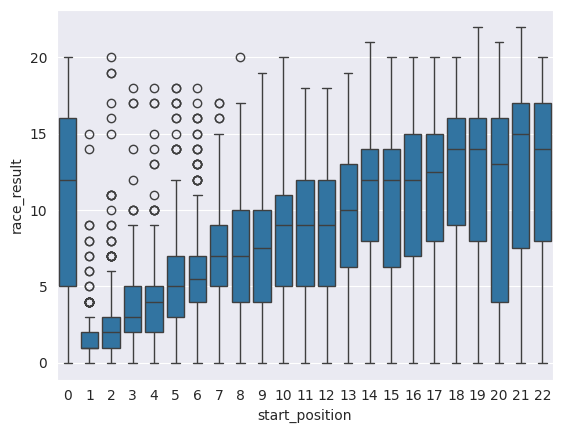

In [44]:
sns.boxplot(dp, x="start_position", y="race_result")

### Let's plot and see, whether the place at the start of the grand prix determine the race result for a driver.

In [45]:
def heatmap(x: pd.Series, y: pd.Series):
    crosstab = pd.crosstab(y, x)
    ax = sns.heatmap(crosstab, cmap="viridis", annot=False)
    return ax.figure

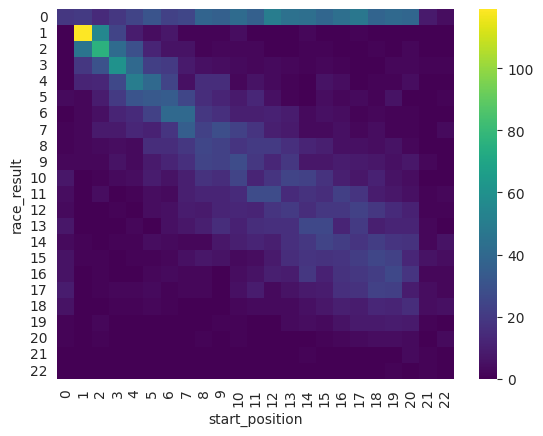

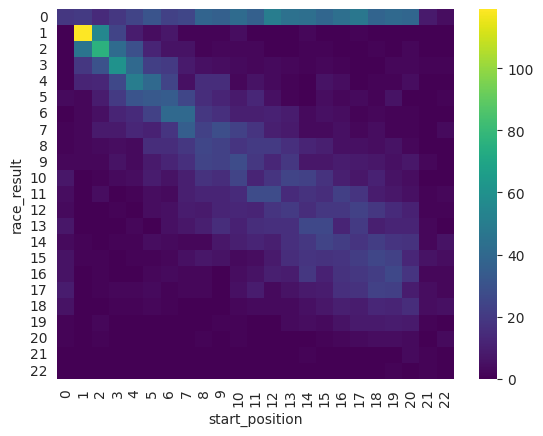

In [46]:
heatmap(dp["start_position"], dp["race_result"])

### Why are we plotting race_result against the start_position and then once again against the qualifying result? The second heat map illustrates better the tempo of a driver and a car, while the first shows us the starting positions after qualifying and grid penalties e.g. for blocking another driver or car changes like PU (power unit).

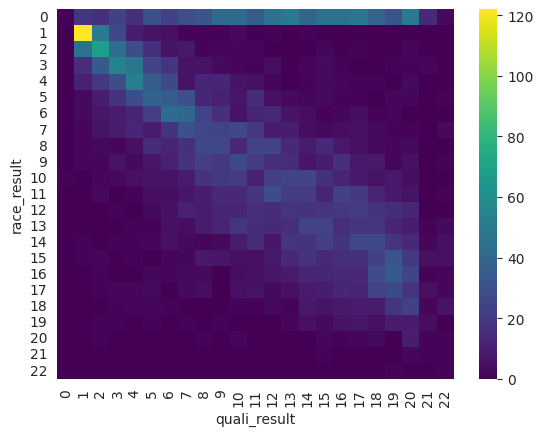

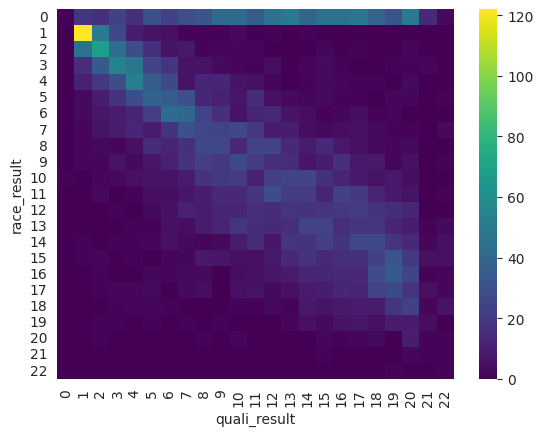

In [47]:
heatmap(dp["quali_result"], dp["race_result"])

In [48]:
dp.corr(method="pearson", numeric_only=True)

,start_position,race_result,quali_result
start_position,1.000000,0.469026,0.898679
race_result,0.469026,1.000000,0.512902
quali_result,0.898679,0.512902,1.000000


### We can clearly see that the higher we qualify and start the race, the higher are chances that we will finish the race or even win it. While being in the middel of a F1 pack makes it more probable that driver will crash with others.

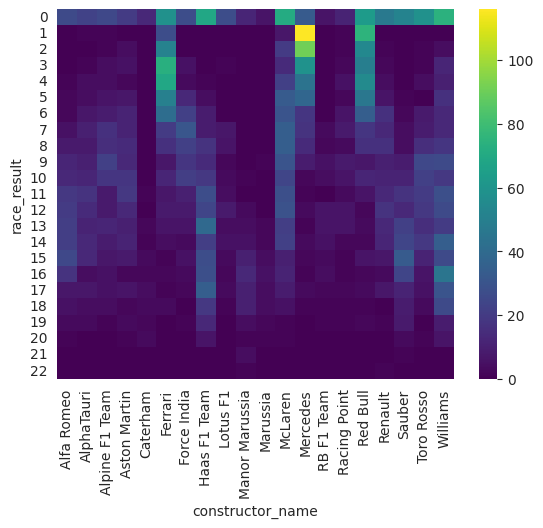

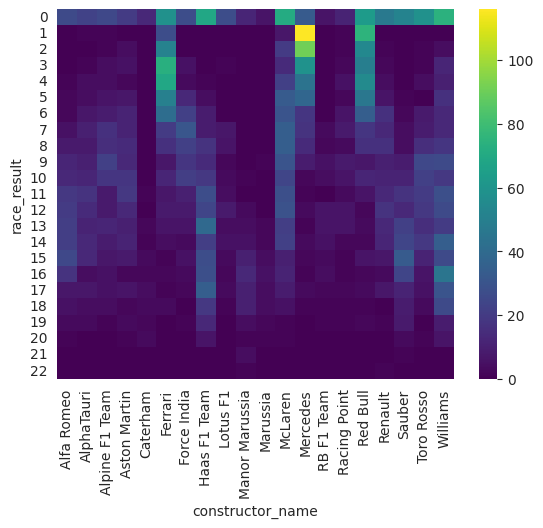

In [49]:
heatmap(dp["constructor_name"], dp["race_result"])

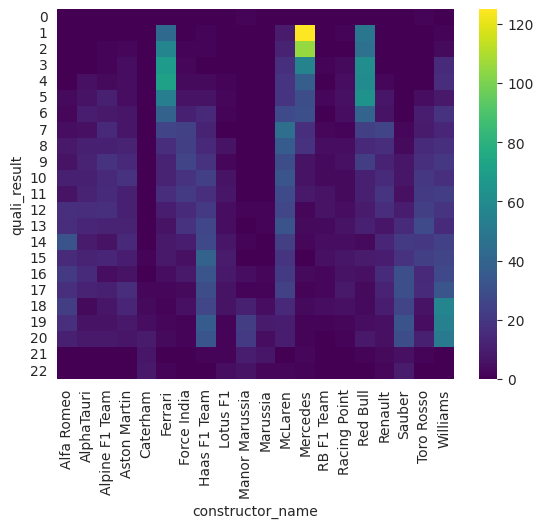

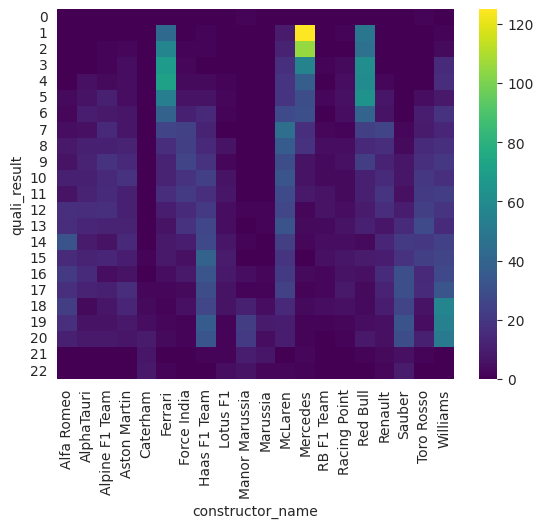

In [50]:
heatmap(dp["constructor_name"], dp["quali_result"])

<Axes: xlabel='constructor_name', ylabel='race_result'>

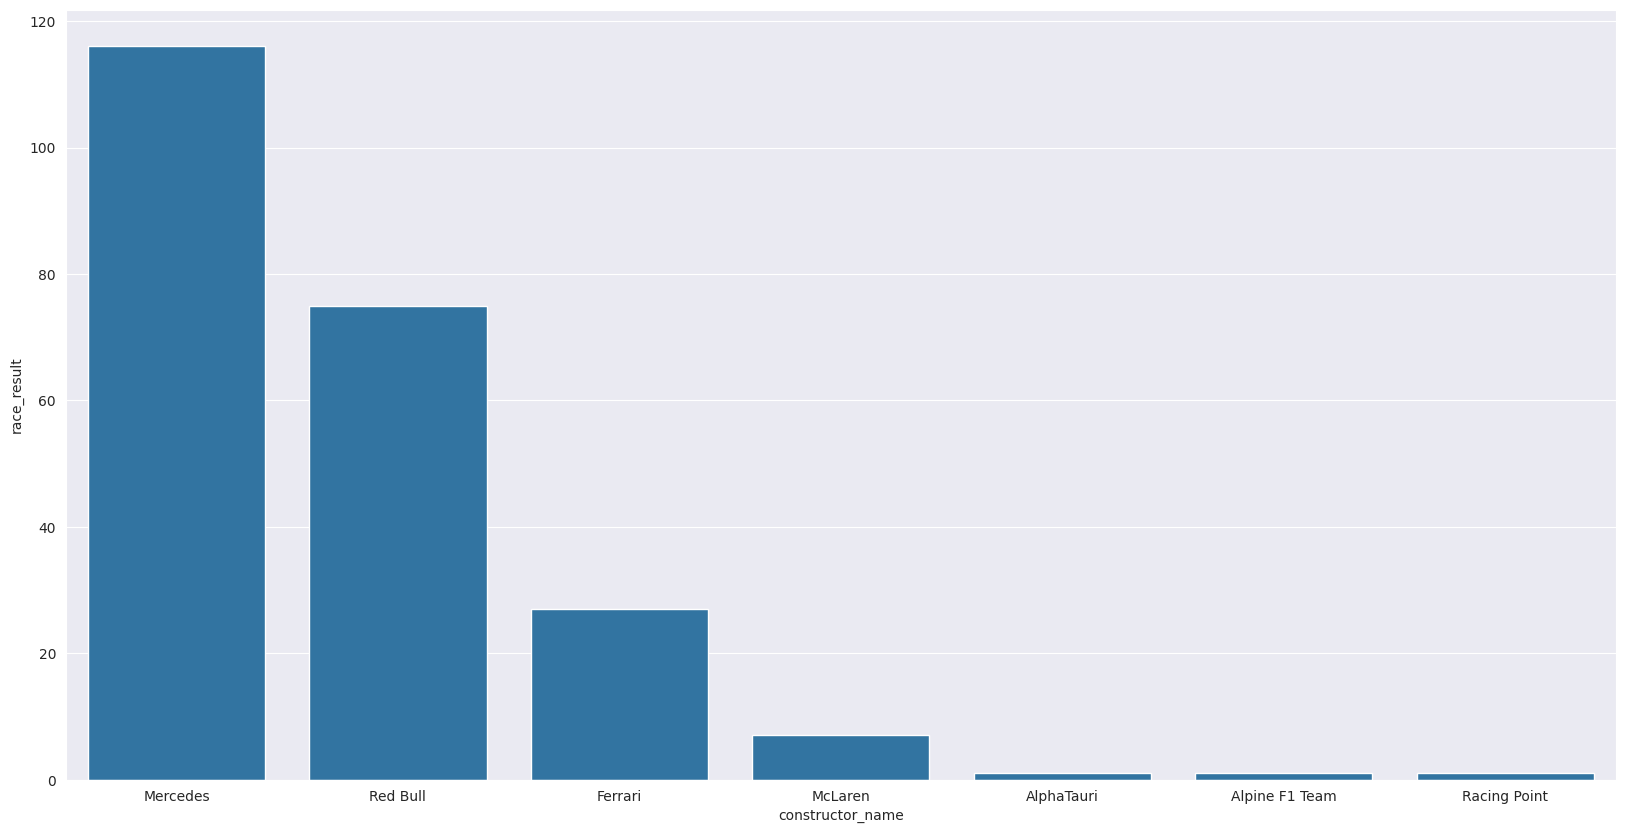

In [51]:
constructor_wins = (
    dp[["constructor_name", "race_result"]][dp["race_result"] == 1]
    .groupby("constructor_name", observed=True, as_index=False)
    .count()
)

plt.subplots(figsize=(20, 10))
sns.barplot(
    constructor_wins,
    x="constructor_name",
    y="race_result",
    order=constructor_wins.sort_values(by="race_result", ascending=False)[
        "constructor_name"
    ],
)

In [52]:
# TODO: Create new features like win ratio and plot them too. Try this also with rolling window
test = dp.copy(deep=True)
driver_win_ratio = (
    dp[(dp["driver_name"] == "Lewis Hamilton")]["race_result"]
    .rolling(window=3)
    .mean()
    .round(2)
).fillna(value=0)
driver_win_ratio

22145    0.00
22149    0.00
22171    0.67
22193    1.00
22215    1.00
         ... 
26662    3.33
26688    4.67
26700    5.33
26730    8.00
26742    6.00
Name: race_result, Length: 227, dtype: float64

### We can see that three teams are way ahead of others, and those are Mercedes, Ferrari and RedBull.

## Summary
### The cutoff date for the data is 2024-12-08(YYYY-MM-DD), so it gives us the whole 2025 season to then test models upon, maybe we will be able to accurately predict, who got championship this year(Lando Norris).
### Qualifying position and start position are very strong predictors, as to whether driver will score good on the Saturday, or even finish the race. Because the data show, that the further from the pole position we start, the higher the chance we will not finish a race. The most endangered drivers are those in the so called midfield.

### As we have some information about our our data, I think that it is a good time to start preparing input data for models, and create some additional features, that would for example represent drivers/constructors recent form from 5 last races.

# Models

### Now we will try out a few different models on our data, and see what we get in return. If they behave quite well on the data, we will try and make some additional data for the models to learn on, to make them even better. If it turns out that we don't get the desired results on many different models, we will try to rething data that we them with.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
# X, y = train_test_split(, random_seed=42)